In [332]:
using Plots, LaTeXStrings
# Establishing Imports
include("diffusion.jl")
include("run_and_tumble.jl")

using .Diffusion, .RunAndTumble

# Plotting defaults
default(title="", ylabel="y label", xlabel="x label",
    size=(600, 600), dpi=600, margin=5Plots.mm, framestyle=:box, yguidefontrotation=-90)


const DARKBLUE = "#084081"
const BLUE1 = "#2b8cbe"
const BLUE2 = "#4eb3d3"
const BLUE3 = "#7bccc4"
const LIGHTGREEN = "#a8ddb5"

# :==== TITLE TEMPLATE ====:

"#a8ddb5"

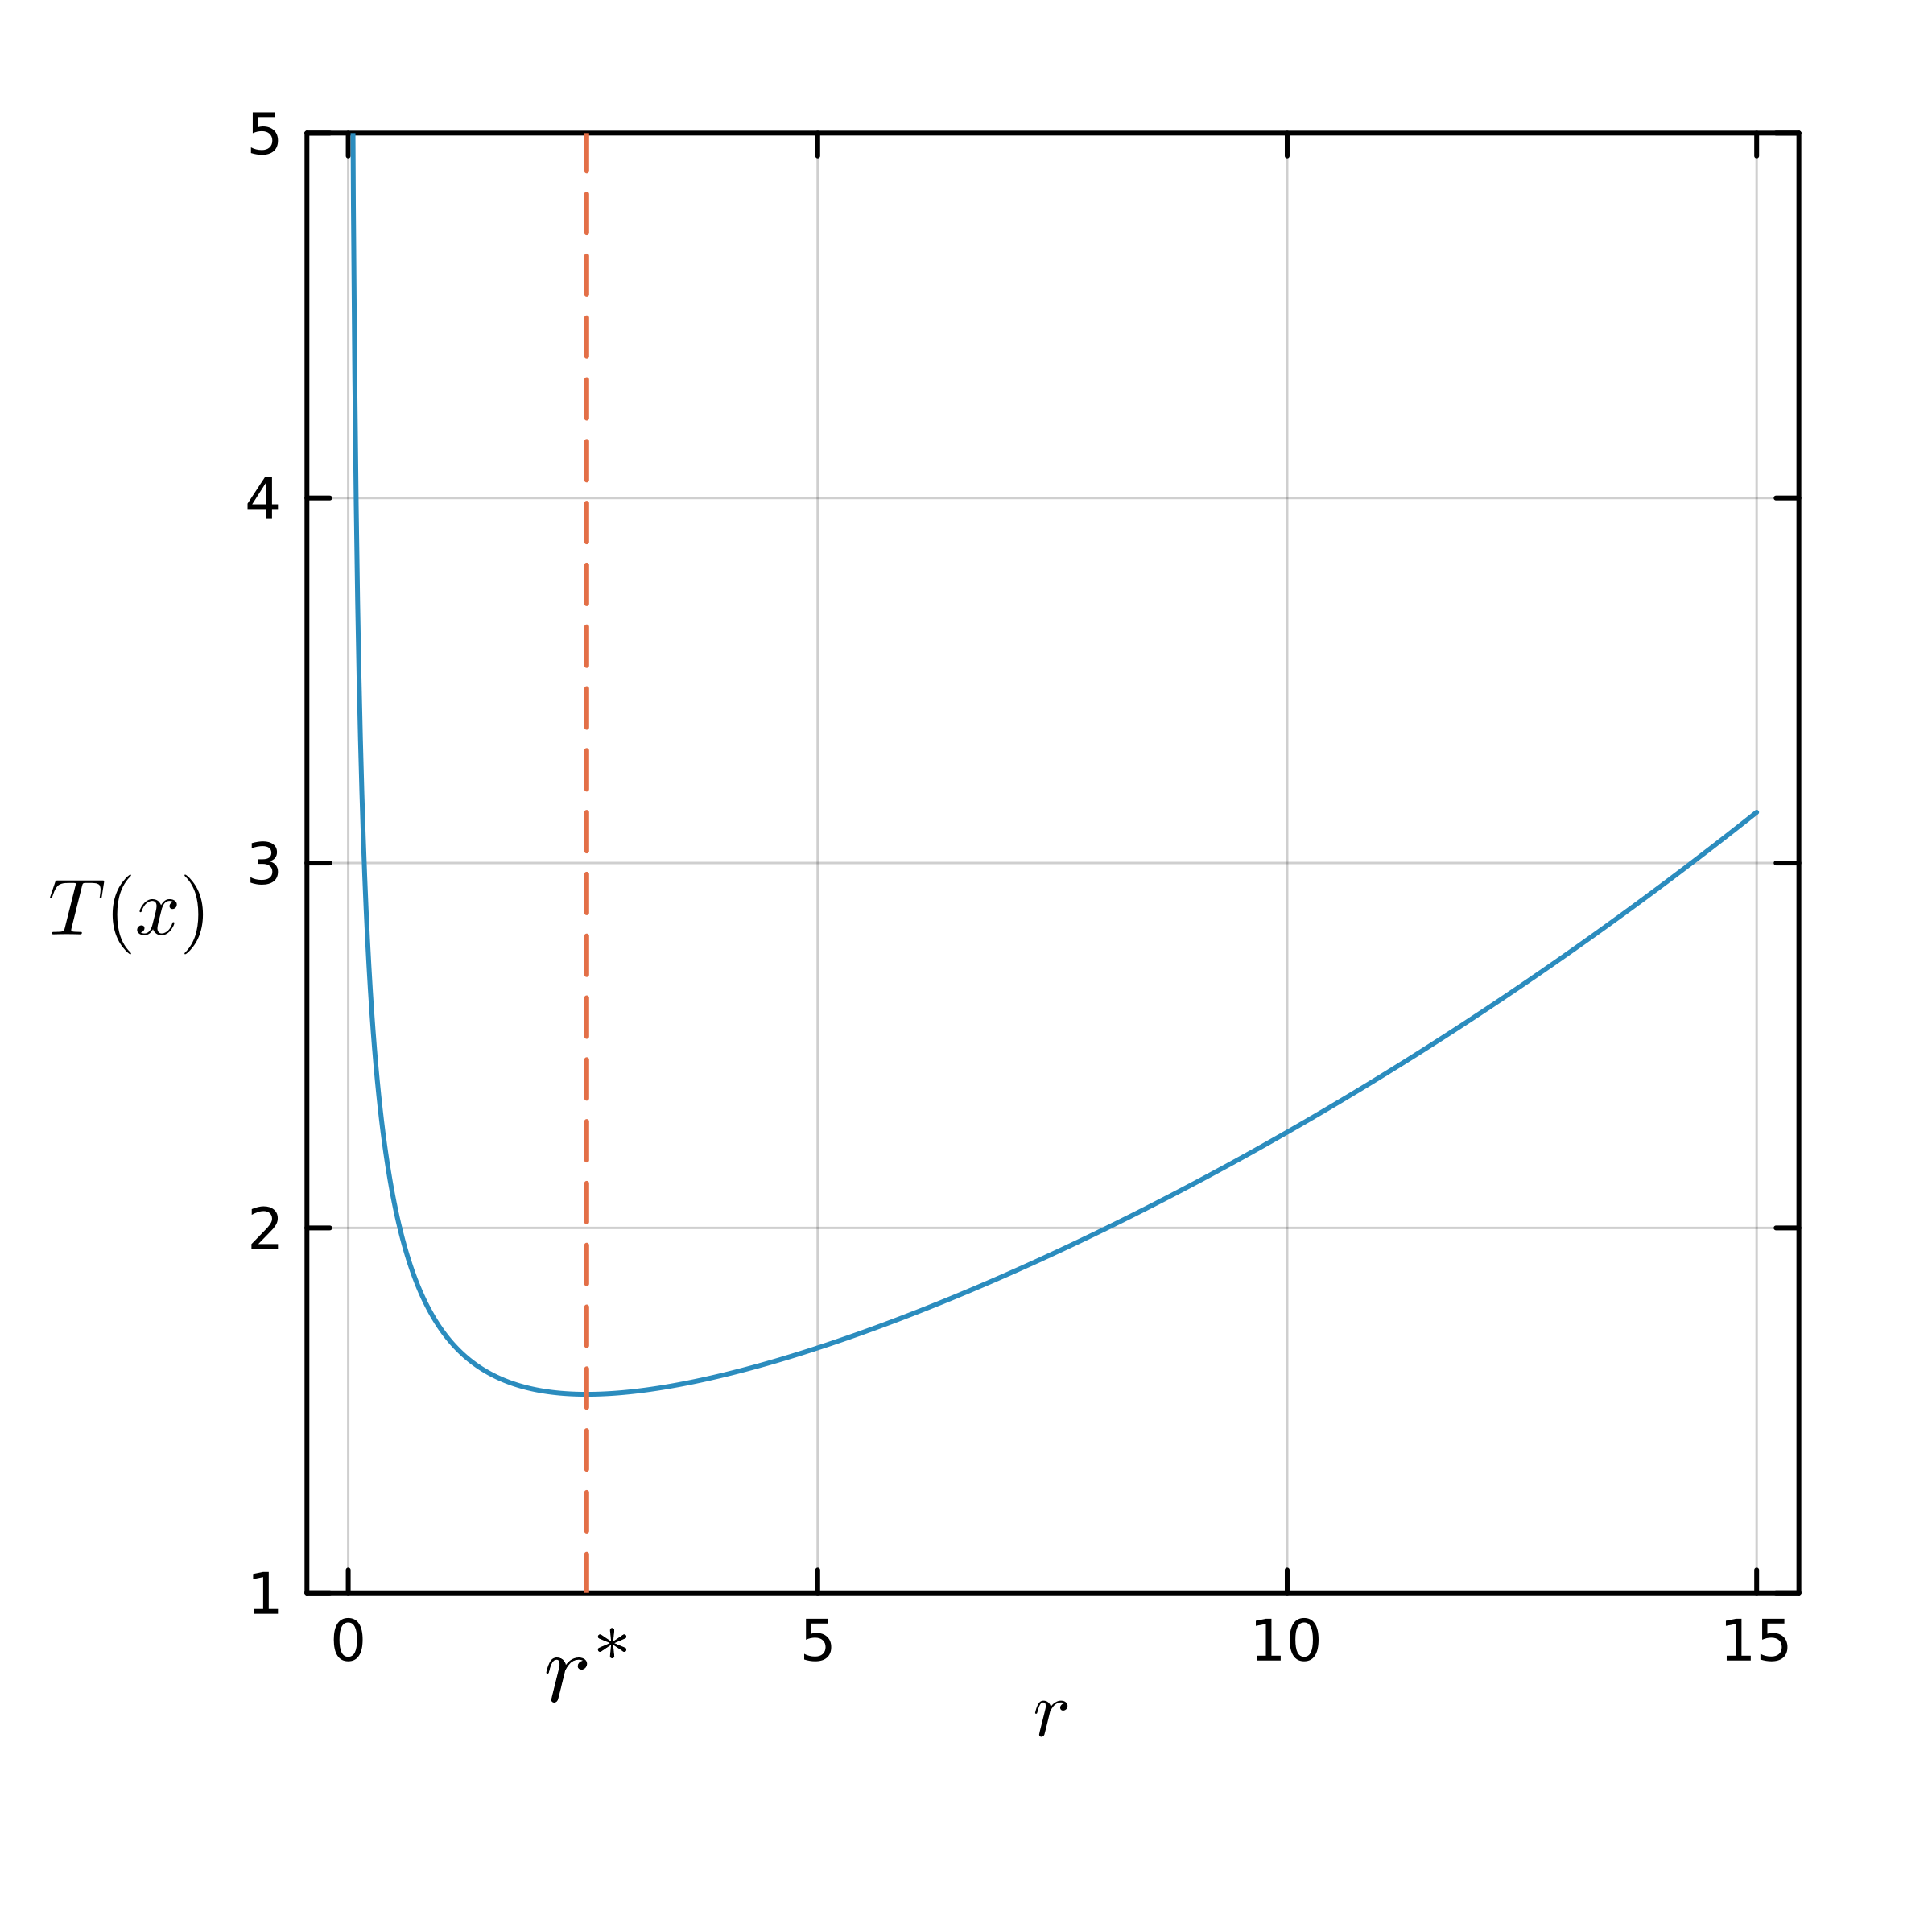

In [333]:
# :==== MFPT AS A FUNCTION OF R ====:
x_0, D = 1, 1

r = range(0.01, 15, 1000)
MFPT = r -> Diffusion.T(x_0, r, D)
r_0 = 2.53962


plt = plot(size=(400, 400), ylabel=L"T(x)", xlabel=L"r")

plot!(r, MFPT, ylim=(1, 5), legend=:none, c=BLUE1)
vline!([r_0], linestyle=:dash)
annotate!(r_0, 0.8, text(L"r^*", :centre))
savefig("./figures/MFPT_plot.pdf")

plt

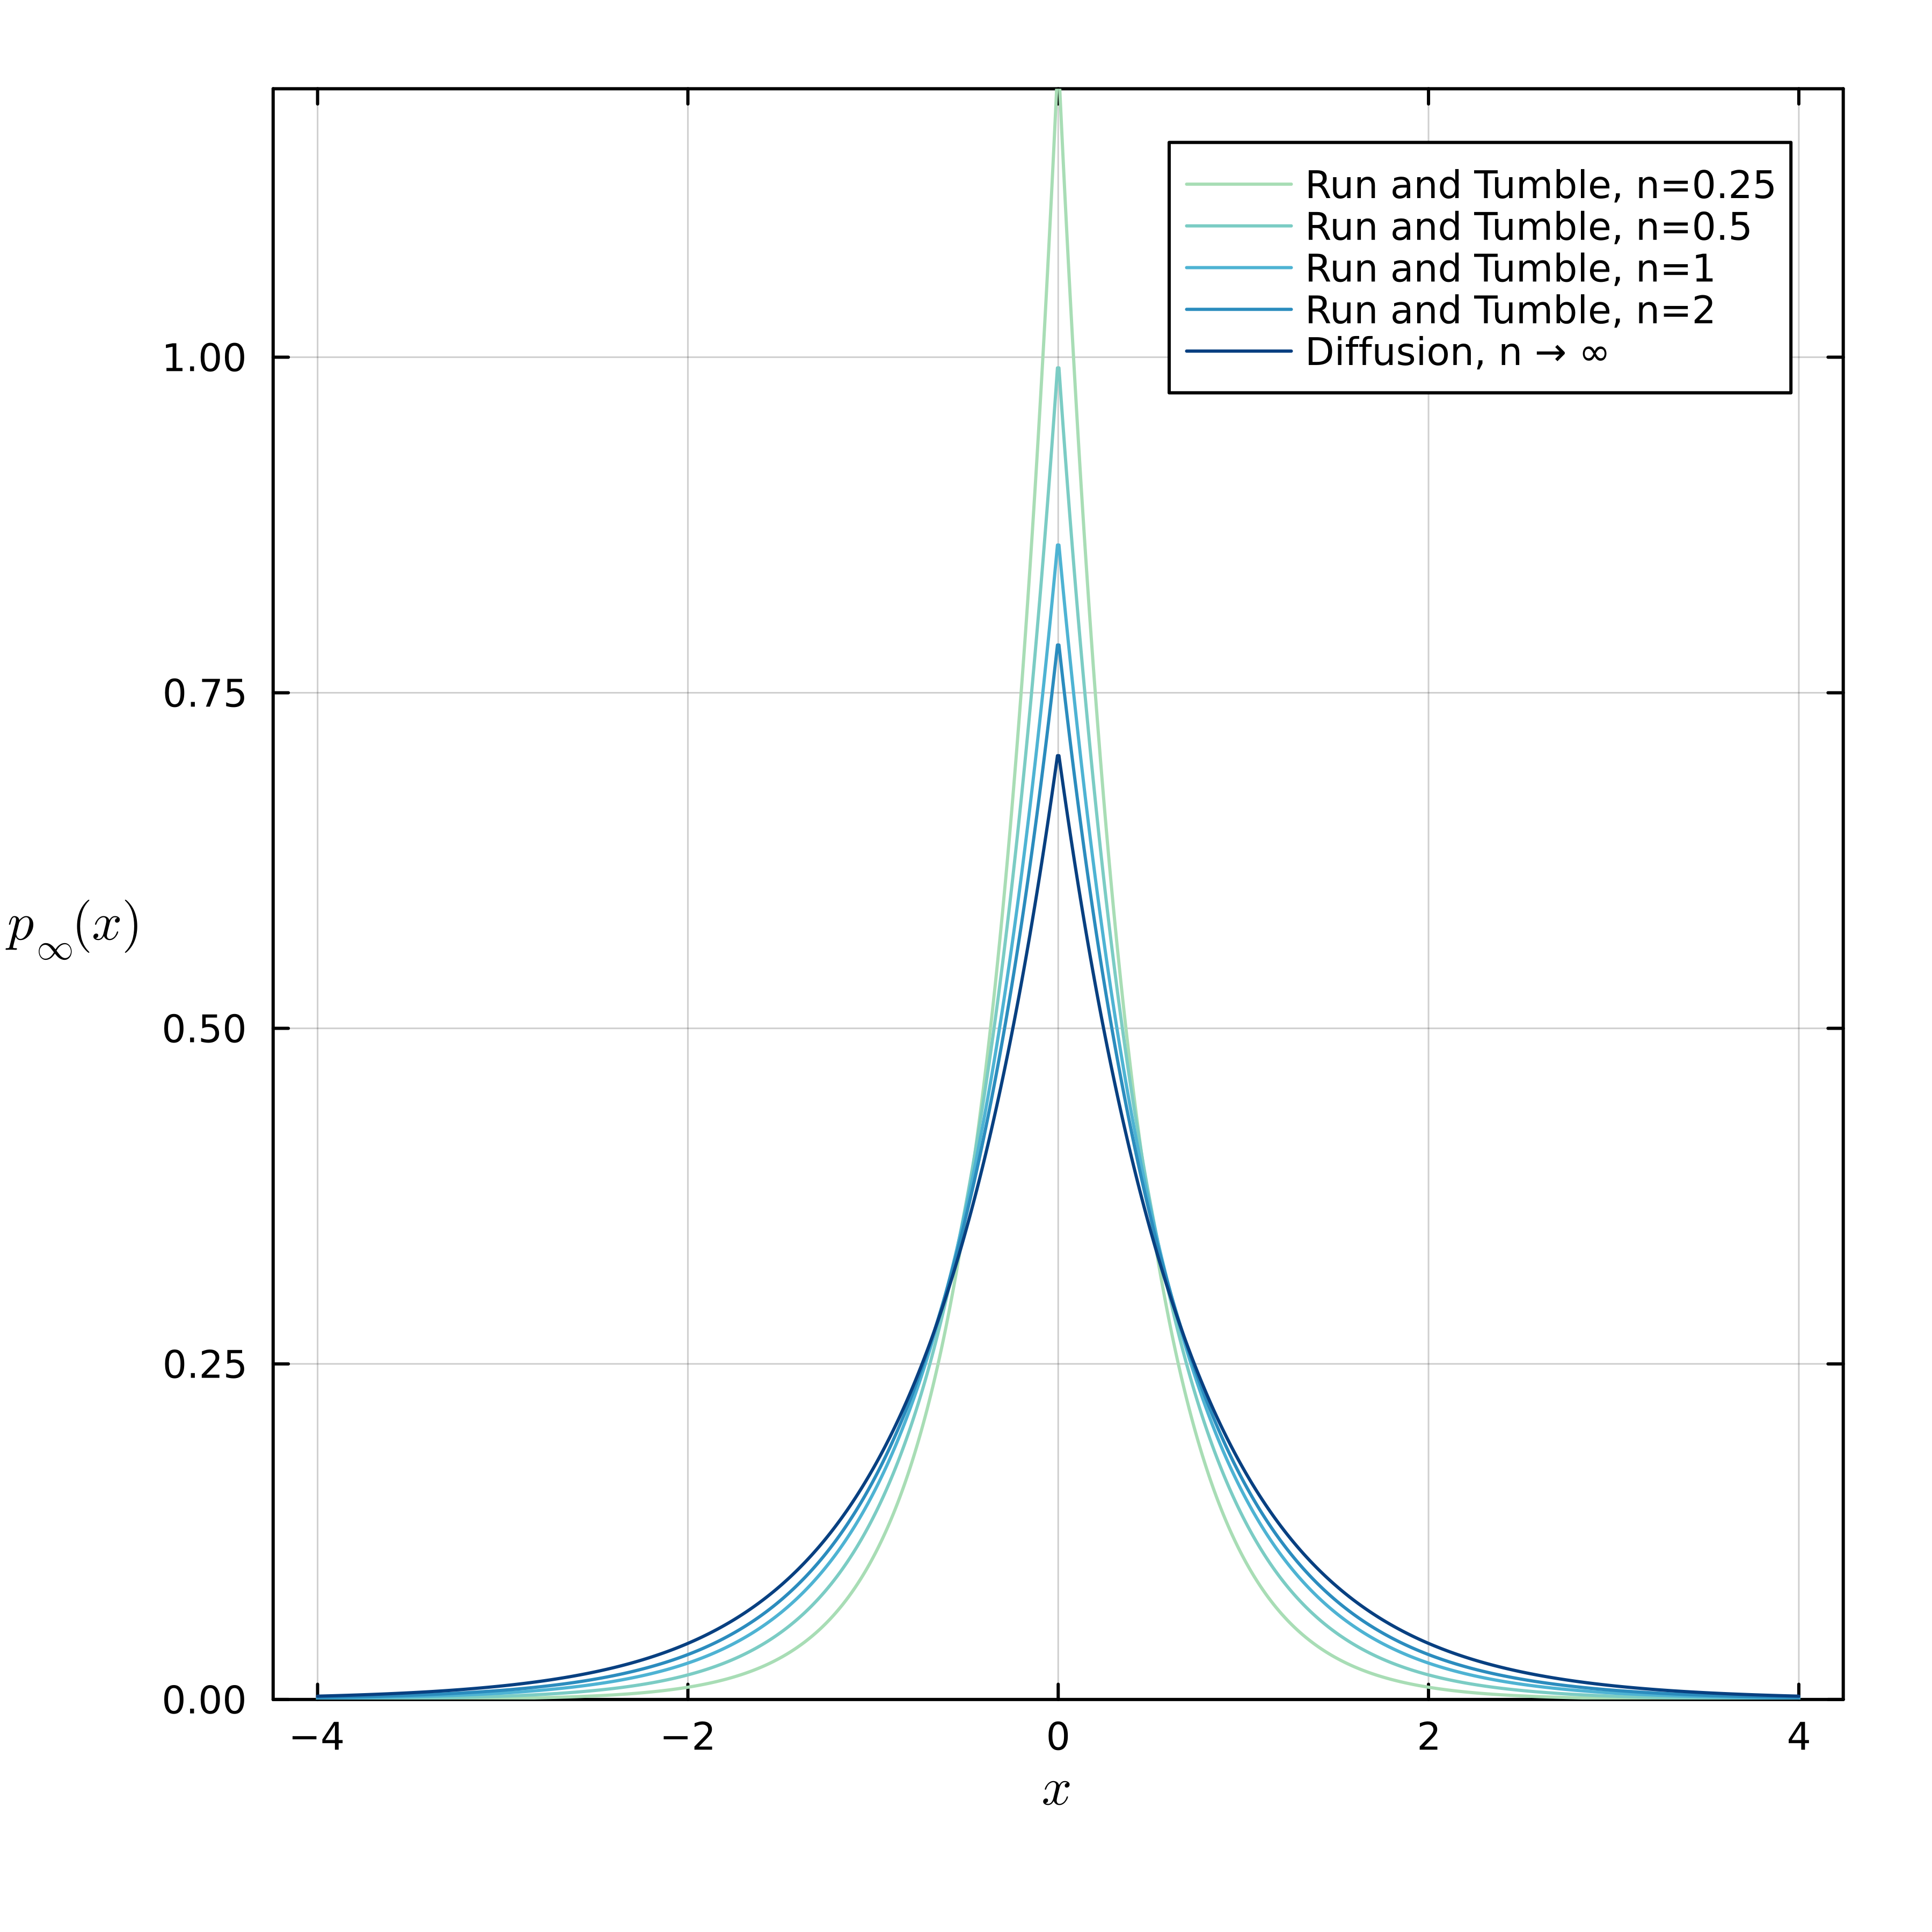

In [351]:
# :==== STEADY-STATE COMPARISON ====:
r, x_0 = 1, 0
γ, v_0 = 1, 1
D = v_0^2/2γ

x = range(-4, 4, 1000)

# Run-and-tumble dynamics
RnT_n(n) = (x̃, r̃, γ̃, ṽ_0) -> RunAndTumble.p_st(x̃, r̃, γ̃*n, ṽ_0 * sqrt(n))

plt = plot(xlabel=L"x", ylabel=L"p_\infty(x)")

# Run-and-tumble
plot!(x, RnT_n(0.25).(x, r, γ, v_0), label="Run and Tumble, n=0.25", c=LIGHTGREEN)
plot!(x, RnT_n(0.5).(x, r, γ, v_0), label="Run and Tumble, n=0.5", c=BLUE3)
plot!(x, RnT_n(1).(x, r, γ, v_0), label="Run and Tumble, n=1", c=BLUE2)
plot!(x, RnT_n(2).(x, r, γ, v_0), label="Run and Tumble, n=2", c=BLUE1)

# Diffusion
plot!(x, Diffusion.p_st.(x, x_0, r, D), label="Diffusion, n → ∞", ylim=(0, 1.2), c=DARKBLUE)
#annotate!(0.7, .9, text(L"r = 1, D = 1/2"*'\n'*L"v_0 = \sqrt{n}, \gamma = v_0^2 = n", :left ))

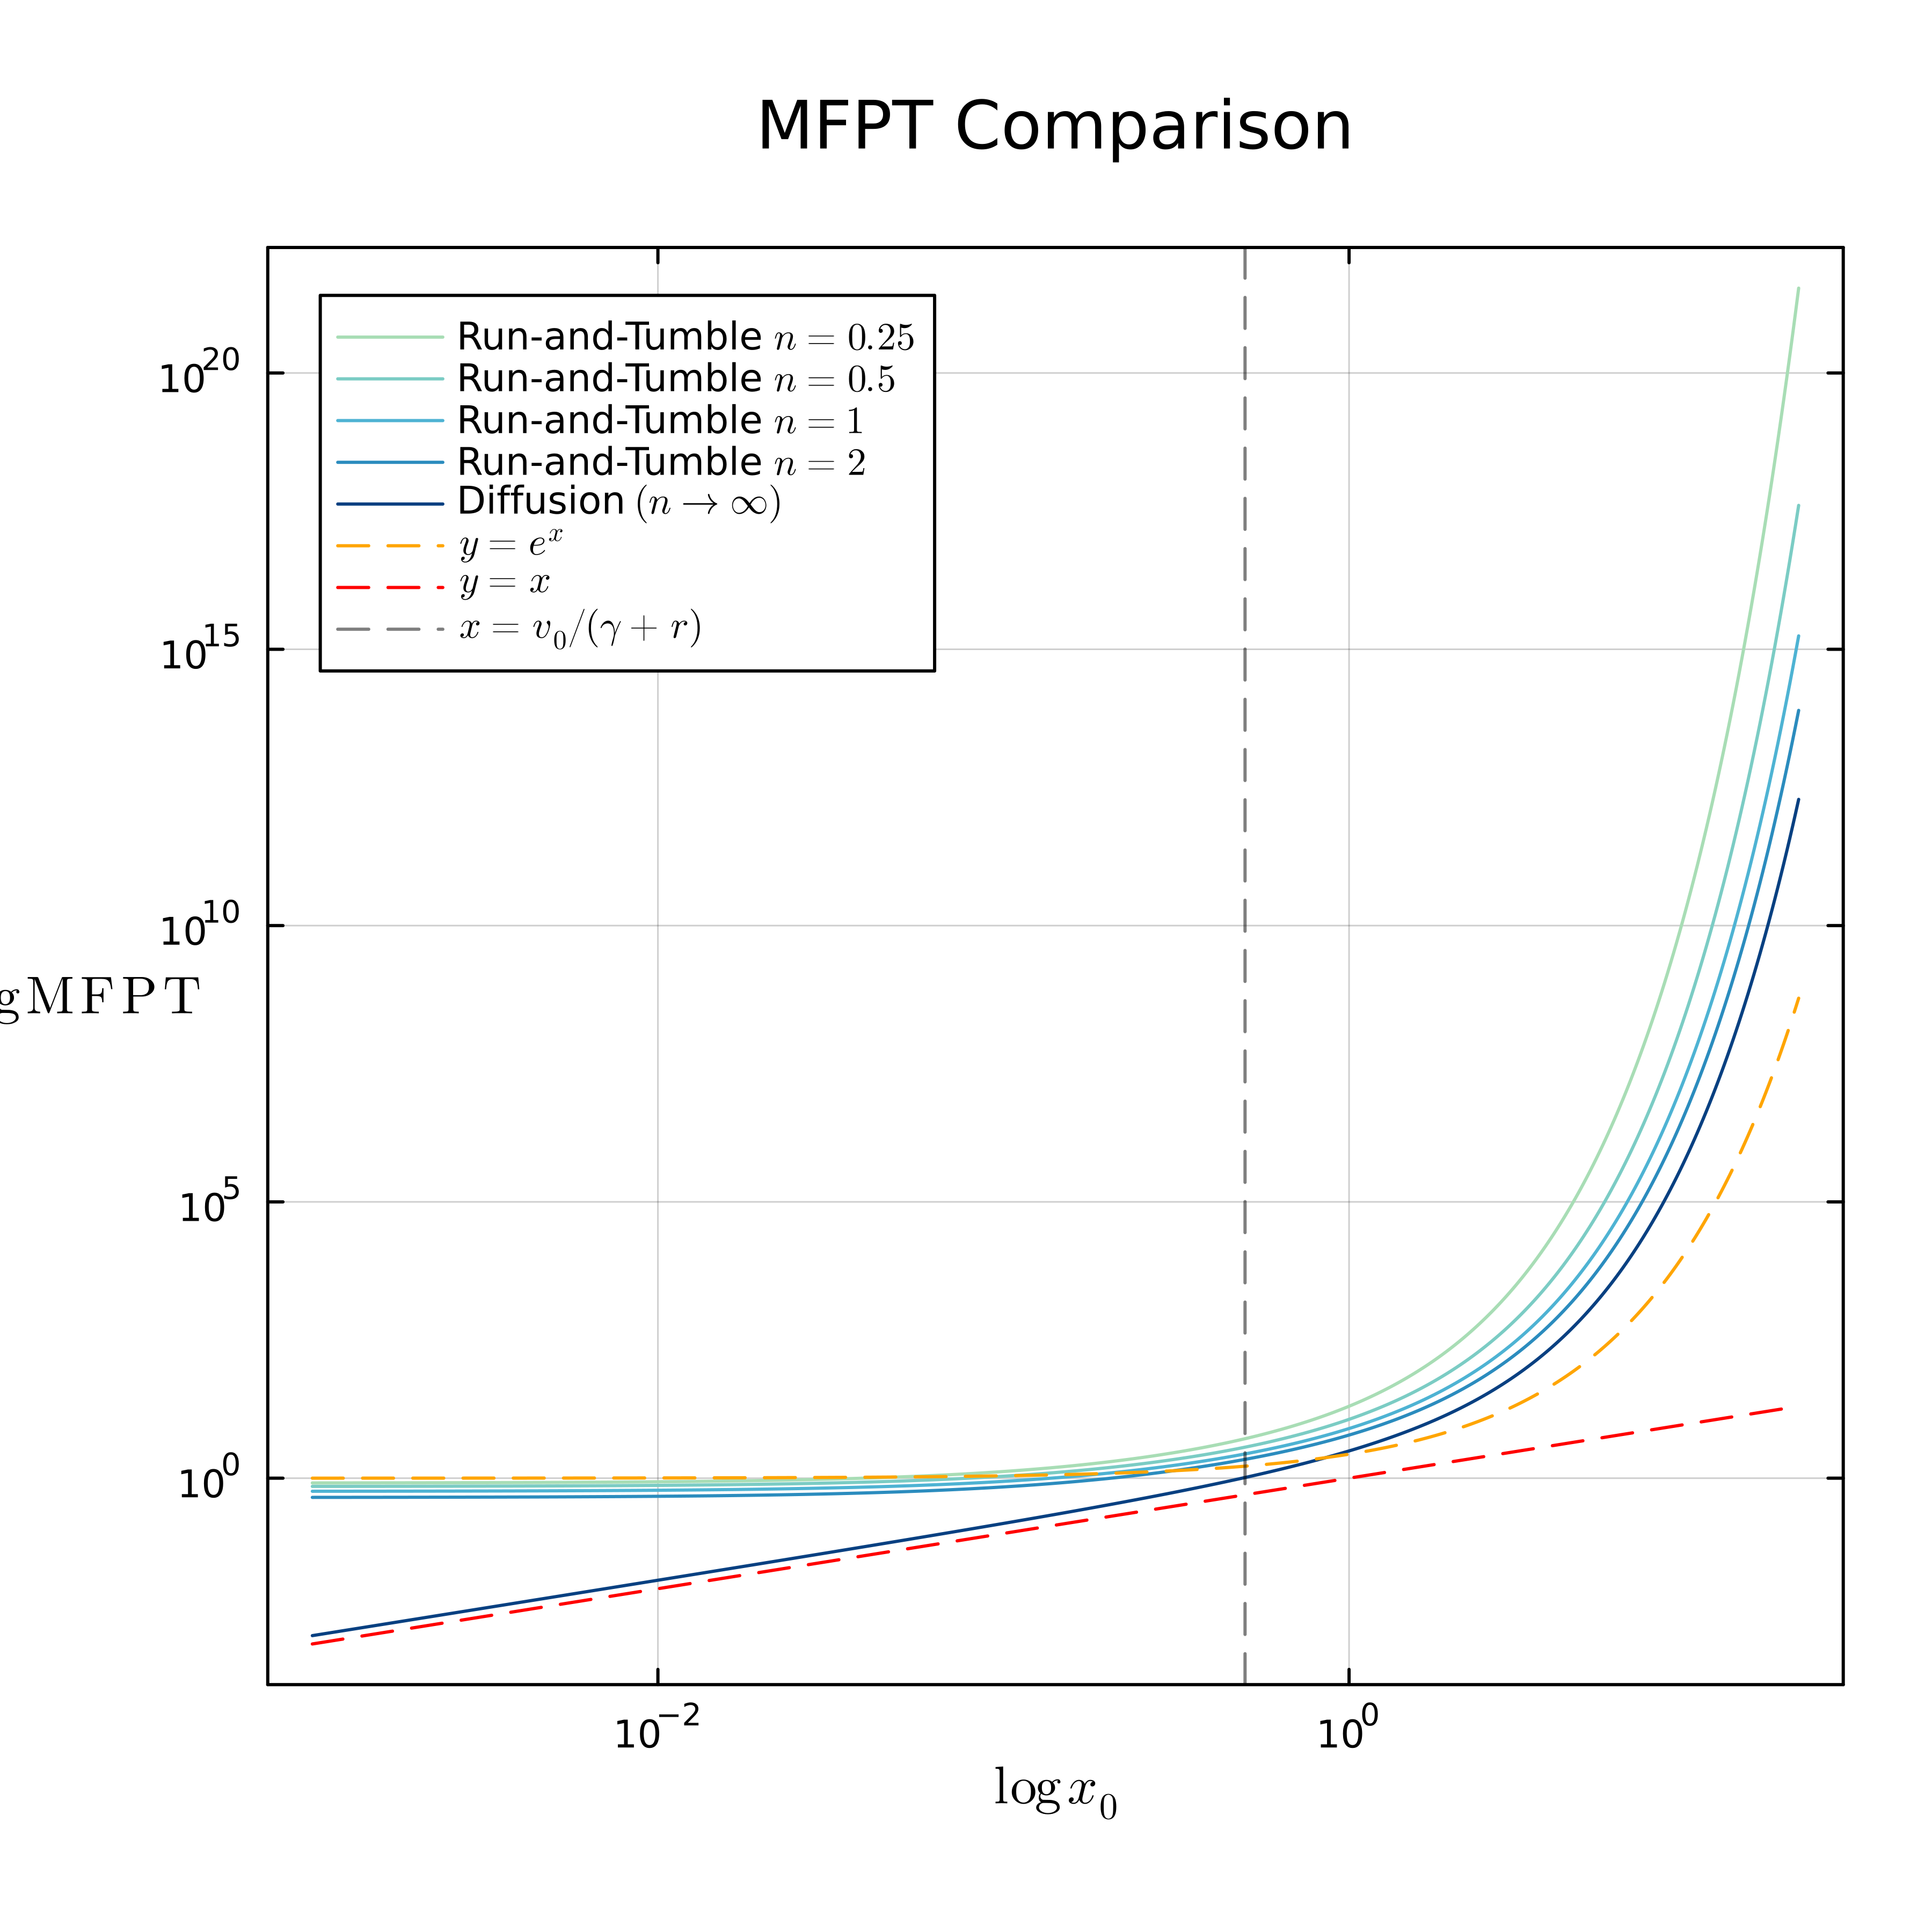

In [352]:
# :==== MFPT Comparison ====:
r, x_0 = 1, 0
γ, v_0 = 1, 1
D = v_0^2/2γ

x_0 = 10 .^ (range(log10(0.001), log10(20), 500)) # log-range

# Run-and-tumble MFPT
RnT_x = n -> X_r -> RunAndTumble.T(X_r, r, γ*n, v_0*sqrt(n))

plot(title="\nMFPT Comparison", ylabel=L"\log \textrm{MFPT}", xlabel=L"\log x_0", xscale=:log10, yscale=:log10, legend=:topleft)

# Run-and-tumble
plot!(x_0, RnT_x(0.25), label="Run-and-Tumble "*L"n=0.25", c=LIGHTGREEN)
plot!(x_0, RnT_x(.5), label="Run-and-Tumble "*L"n=0.5", c=BLUE3)
plot!(x_0, RnT_x(1), label="Run-and-Tumble "*L"n=1", c=BLUE2)
plot!(x_0, RnT_x(2), label="Run-and-Tumble "*L"n=2", c=BLUE1)

# Diffusion
plot!(x_0, Diffusion.T.(x_0, r, D), label="Diffusion "*L"(n\rightarrow\infty)", c=DARKBLUE)

# References
plot!(x_0, exp.(x_0), label=L"y=e^x", c=:orange, linestyle=:dash)
plot!(x_0, x_0, label=L"y=x", c=:red, linestyle=:dash)

# Qualitative change
ϕ = v_0 / (γ + r)
vline!([ϕ], linestyle=:dash, c="black", label=L"x=v_0/(γ + r)", opacity=0.5)